# Import Library

Pada bagian ini, seluruh library yang dibutuhkan untuk analisis data, visualisasi, pemrosesan teks, pembuatan model machine learning, dan evaluasi dimuat.
Library seperti `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn`, `tensorflow`, dan `textblob` merupakan komponen utama dalam proses ini.


In [1]:
#  Analisis Data
import pandas as pd
import numpy as np

#  Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#  Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#  Evaluasi & Similarity
from sklearn.metrics.pairwise import cosine_similarity

#  Machine Learning - Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import nltk

#  NLP (Text Processing)
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
# NLP (Text Processing)
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer # Pastikan TfidfVectorizer diimpor
#  Google Colab
from google.colab import files
from sklearn.neighbors import NearestNeighbors


### Persiapan Resource NLP untuk TextBlob & NLTK

Mengunduh korpus dan tagger yang dibutuhkan oleh library NLTK dan TextBlob untuk analisis teks, seperti tokenisasi, part-of-speech tagging, dan klasifikasi gramatikal.

In [2]:
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('tagsets')
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


# Upload Dataset ke Colab

Mengunggah file dataset dari komputer lokal ke lingkungan Google Colab menggunakan files.upload(). Data ini akan digunakan untuk proses analisis dan pembangunan sistem rekomendasi.

In [3]:
# Meng-upload file
uploaded = files.upload()

Saving Books.csv to Books.csv
Saving Ratings.csv to Ratings.csv
Saving Users.csv to Users.csv


# Read Dataset

Membaca seluruh file CSV yang telah diunggah ke dalam DataFrame menggunakan pandas.

In [4]:
# Membaca dataset
df_books = pd.read_csv('Books.csv')
df_ratings = pd.read_csv('Ratings.csv')
df_users = pd.read_csv('Users.csv')

<ipython-input-4-cdf4ebe8562b>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('Books.csv')


### Menampilkan Cuplikan Dataset

Menampilkan 5 baris pertama dari setiap DataFrame untuk mendapatkan gambaran awal isi dataset:

In [5]:
print("Books Dataset:")
print(df_books.head(), "\n")

print("Ratings Dataset (with ID):")
print(df_ratings.head(), "\n")

print("Users Dataset:")
print(df_users.head(), "\n")

Books Dataset:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://ima

# Books Dataset:

- ISBN: Nomor Identifikasi Buku Standar Internasional yang unik untuk setiap buku.
- Book-Title: Judul buku.
- Book-Author: Nama penulis buku.
- Year-Of-Publication: Tahun buku diterbitkan.
- Publisher: Penerbit buku.
- Image-URL-S: URL gambar sampul buku (ukuran kecil).
- Image-URL-M: URL gambar sampul buku (ukuran sedang).
- Image-URL-L: URL gambar sampul buku (ukuran besar).

# Ratings Dataset (with ID):

- User-ID: ID unik untuk setiap pengguna yang memberikan rating.
- ISBN: ISBN buku yang diberi rating.
- Book-Rating: Rating yang diberikan pengguna untuk buku tersebut (nilai dari 0 - hingga 10).

# Users Dataset:

- User-ID: ID unik untuk setiap pengguna.
- Location: Lokasi atau kota tempat tinggal pengguna.
- Age: Usia pengguna.

### Statistik Deskriptif Dataset books

Kode ini menampilkan statistik deskriptif dari dataset df_books, df_ratings, dan df_users mencakup semua kolom (include='all'), baik numerik maupun kategorikal. Informasi yang ditampilkan meliputi:
- Count (jumlah entri tidak null)
- Unique (jumlah nilai unik untuk kolom kategorikal)
- Top (nilai yang paling sering muncul)
- Freq (frekuensi dari nilai yang paling sering muncul)
- Mean, Std, Min, Max (untuk kolom numerik)

Tujuannya adalah untuk memahami karakteristik dasar dari data pengguna.

In [6]:
df_books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


### Statistik Deskriptif Dataset ratings

In [7]:
df_ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


### Statistik Deskriptif Dataset users

In [8]:
df_users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


# EDA (Exploratory Data Analysis)
Exploratory Data Analysis (EDA) adalah tahap awal dalam proses analisis data di mana kita mengeksplorasi dan memahami karakteristik data secara menyeluruh sebelum membangun model machine learning. Tujuan utamanya adalah:
- Memahami struktur dan isi dataset.
- Mendeteksi masalah dalam data seperti missing values, duplikat, atau outlier.
- Mengidentifikasi pola, hubungan antar fitur, dan distribusi data.
- Menyediakan dasar pengambilan keputusan untuk preprocessing atau pemilihan model.

## 1. Informasi Umum Dataset

Pada bagian ini ditampilkan informasi struktural dari setiap dataset, yaitu:
- df_books: Dataset buku — menunjukkan jumlah entri (baris), tipe data setiap kolom, dan jumlah nilai non-null.
- df_ratings: Dataset rating buku — berisi informasi tentang rating yang diberikan pengguna untuk buku tertentu, termasuk ISBN dan rating.
- df_users: Dataset pengguna — mencakup informasi tentang pengguna seperti ID pengguna, lokasi, dan usia.

Dengan fungsi .info(), kita dapat mengecek:
- Apakah ada missing values
- Tipe data dari tiap kolom
- Jumlah total entry per dataset

In [9]:
# Menampilkan informasi umum dari setiap dataset
print("Info Books Dataset:")
print(df_books.info(), "\n")

print("Info Ratings Dataset:")
print(df_ratings.info(), "\n")

print("Info Users Dataset:")
print(df_users.info(), "\n")

Info Books Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None 

Info Ratings Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating

## 2. Pembersihan Kolom Tidak Relevan

Pada tahap ini, dilakukan penghapusan kolom-kolom yang tidak diperlukan atau tidak memiliki nilai informasi penting untuk analisis dan pemodelan. Kolom yang dihapus antara lain:
- Image-URL-S
- Image-URL-M
- Image-URL-L

Kolom-kolom ini berasal dari hasil ekspor file CSV yang kurang bersih atau tidak relevan dengan tujuan analisis. Penghapusan dilakukan secara otomatis untuk setiap dataset (users, books, ratings) jika kolom tersebut ditemukan.

In [10]:
# Daftar kolom yang ingin dihapus
columns_to_drop = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']

# Hapus kolom jika kolom tersebut ada
for df in [df_books, df_ratings, df_users]:
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)



## 3. Pengecekan Missing Values

Pada tahap ini, dilakukan pengecekan untuk melihat apakah ada nilai yang hilang (missing values) di dalam setiap dataset. Missing values dapat mempengaruhi kualitas model, oleh karena itu perlu dilakukan penanganan lebih lanjut seperti pengisian atau penghapusan data yang hilang.

Hasil pengecekan missing values akan menunjukkan jumlah missing values di setiap kolom pada dataset df_books, df_ratings dan df_users. Ini akan memberi gambaran tentang kualitas data yang dimiliki.

In [11]:
print("\nMissing values in df_books:\n", df_books.isnull().sum())
print("\nMissing values in df_ratings:\n", df_ratings.isnull().sum())
print("\nMissing values in df_users:\n", df_users.isnull().sum())


Missing values in df_books:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64

Missing values in df_ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Missing values in df_users:
 User-ID          0
Location         0
Age         110762
dtype: int64


## 4. Menangani Duplikat Data
Di bawah ini adalah pemeriksaan jumlah data duplikat untuk masing-masing dataset. Duplikat dapat mempengaruhi kualitas analisis dan model, sehingga penting untuk mengidentifikasinya dan mengambil tindakan yang sesuai.

In [12]:
print("Duplicates in df_books:", df_books.duplicated().sum())
print("Duplicates in df_ratings:", df_ratings.duplicated().sum())
print("Duplicates in df_users:", df_users.duplicated().sum())

Duplicates in df_books: 0
Duplicates in df_ratings: 0
Duplicates in df_users: 0


## 5. Visualisasi Distribusi Fitur Numerik
Bagian ini bertujuan untuk memvisualisasikan distribusi fitur numerik yang terdapat pada setiap dataset untuk membantu memahami data lebih baik.
- numeric_dfs: List ini berisi DataFrame yang hanya mencakup kolom numerik dari setiap dataset.
- titles: Daftar berisi judul untuk setiap plot yang akan ditampilkan, sesuai dengan dataset terkait.
- Loop untuk plot histogram: Setiap dataset divisualisasikan menggunakan histogram dengan 20 bin untuk menunjukkan distribusi fitur numerik yang ada. tight_layout() digunakan untuk memastikan bahwa label dan elemen plot tidak saling tumpang tindih.

Visualisasi ini membantu kita memahami sebaran data numerik, serta mendeteksi adanya pencilan atau pola distribusi tertentu di setiap dataset.

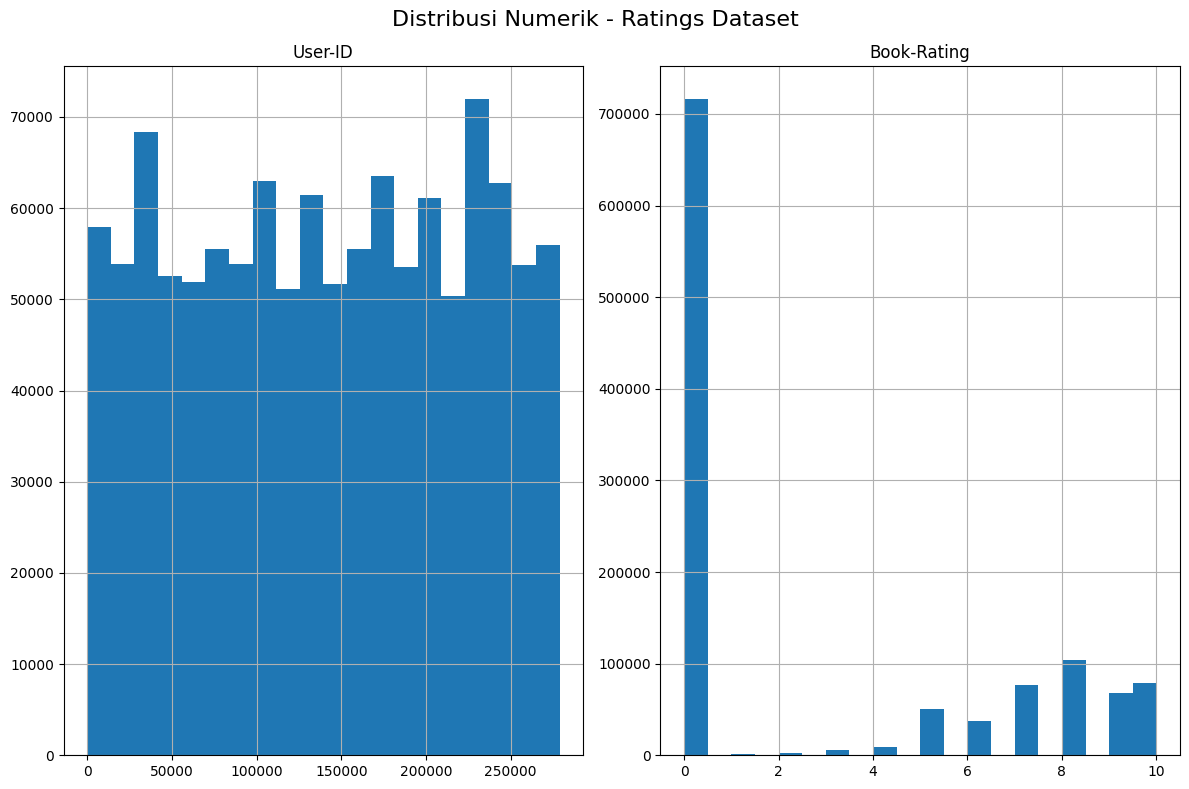

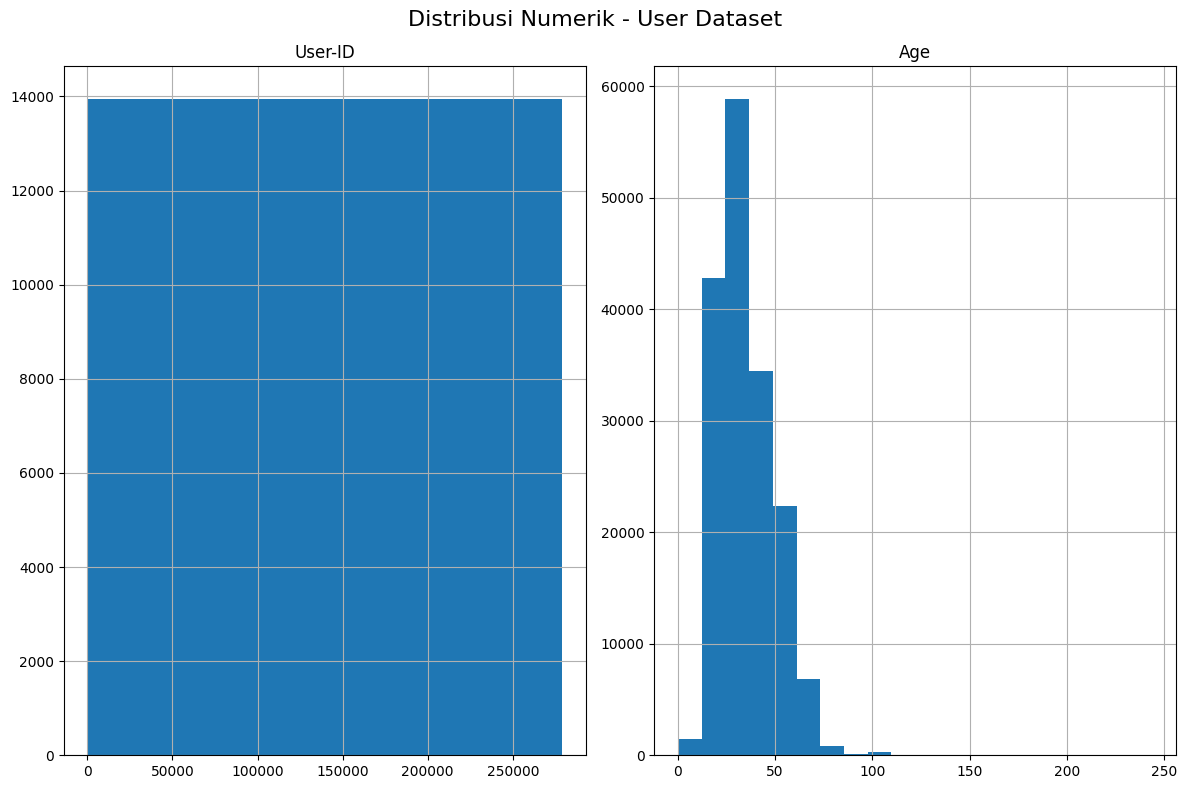

Tidak ada kolom numerik atau datetime untuk diplot di Books Dataset


In [13]:
# Buat list DataFrame numerik
numeric_dfs = [
    df_ratings.select_dtypes(include='number'),
    df_users.select_dtypes(include='number'),
    df_books.select_dtypes(include='number')
]

# Judul plot untuk setiap DataFrame
titles = ['Ratings Dataset', 'User Dataset', 'Books Dataset']

# Loop untuk plotting histogram setiap dataset
for df, title in zip(numeric_dfs, titles):
    # Check if the DataFrame has any columns to plot
    if not df.empty and df.shape[1] > 0:
        df.hist(bins=20, figsize=(12, 8))
        plt.suptitle(f'Distribusi Numerik - {title}', fontsize=16)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Tidak ada kolom numerik atau datetime untuk diplot di {title}")

## 6. Visualisasi Pairplot untuk Fitur Numerik
Bagian ini berfungsi untuk memvisualisasikan hubungan antar fitur numerik menggunakan pairplot. Pairplot memungkinkan kita untuk melihat distribusi dari setiap fitur dan korelasi antar fitur dalam dataset.

Pairplot dilewati untuk: Ratings Dataset (tidak ada kolom numerik untuk diplot)
Menampilkan pairplot untuk: User Dataset


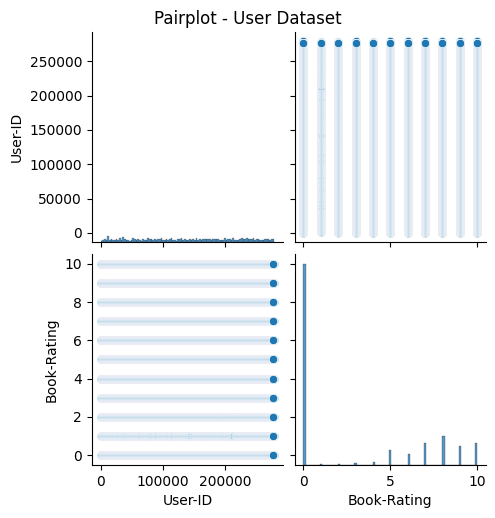

Menampilkan pairplot untuk: Books Dataset


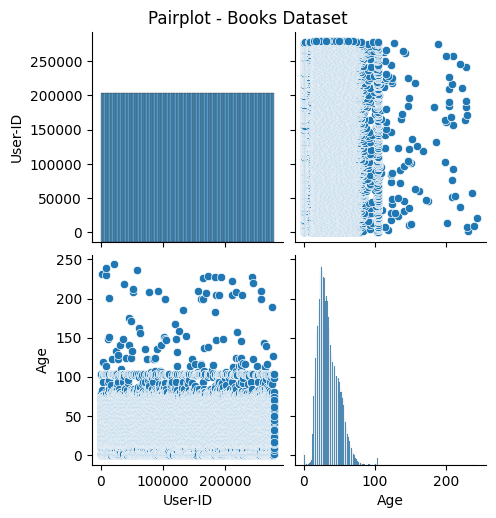

In [14]:
# Ambil hanya fitur numerik dari setiap DataFrame
numeric_dfs = [
    df_books.select_dtypes(include='number'),
    df_ratings.select_dtypes(include='number'),
    df_users.select_dtypes(include='number')
]

titles = ['Ratings Dataset', 'User Dataset', 'Books Dataset']

# Plot pairplot hanya jika jumlah kolom numerik <= 5 DAN DataFrame tidak kosong
for df, title in zip(numeric_dfs, titles):
    # Add this check to ensure the DataFrame is not empty and has columns
    if not df.empty and df.shape[1] > 0:
        if df.shape[1] <= 5:  # batas maksimal kolom untuk pairplot
            print(f"Menampilkan pairplot untuk: {title}")
            sns.pairplot(df)
            plt.suptitle(f'Pairplot - {title}', y=1.02)
            plt.show()
        else:
            print(f"Pairplot dilewati untuk: {title} (jumlah kolom numerik > 5)")
    else:
        # Add a message indicating why pairplot was skipped
        print(f"Pairplot dilewati untuk: {title} (tidak ada kolom numerik untuk diplot)")

Penjelasan:
Visualisasi ini bertujuan untuk memahami distribusi dan karakteristik demografis pengguna dalam dataset, Pada histogram Book-Rating (kanan bawah), terlihat jelas bahwa sebagian besar rating buku terkonsentrasi pada angka 0 (nol). Ada juga beberapa rating yang diberikan di atas 0 hingga 10, namun jumlahnya jauh lebih sedikit. Ini menunjukkan adanya banyak buku yang mungkin belum mendapatkan rating atau mendapatkan rating 0 secara default, atau pengguna cenderung tidak memberikan rating positif.

Untuk Dataset Rating Buku: Dominansi rating 0 mengindikasikan adanya data sparisty (jarangnya data) atau kecenderungan pengguna untuk tidak memberikan rating tinggi. Hal ini penting untuk dipertimbangkan dalam membangun sistem rekomendasi agar tidak bias terhadap buku-buku dengan rating rendah atau belum di-rating.

Dengan demikian, visualisasi ini tidak hanya menggambarkan data numerik, tetapi juga memberi pemahaman tentang siapa pengguna utama sistem rekomendasi yang sedang dikembangkan.


## 7. Visualisasi Heatmap Korelasi
Bagian ini bertujuan untuk menampilkan heatmap korelasi antar fitur numerik dalam setiap dataset. Heatmap korelasi memungkinkan kita untuk dengan cepat mengidentifikasi hubungan antar variabel, dengan warna yang menunjukkan tingkat korelasi antara fitur-fitur tersebut.

Heatmap dilewati untuk: Ratings Dataset (jumlah kolom numerik terlalu sedikit)


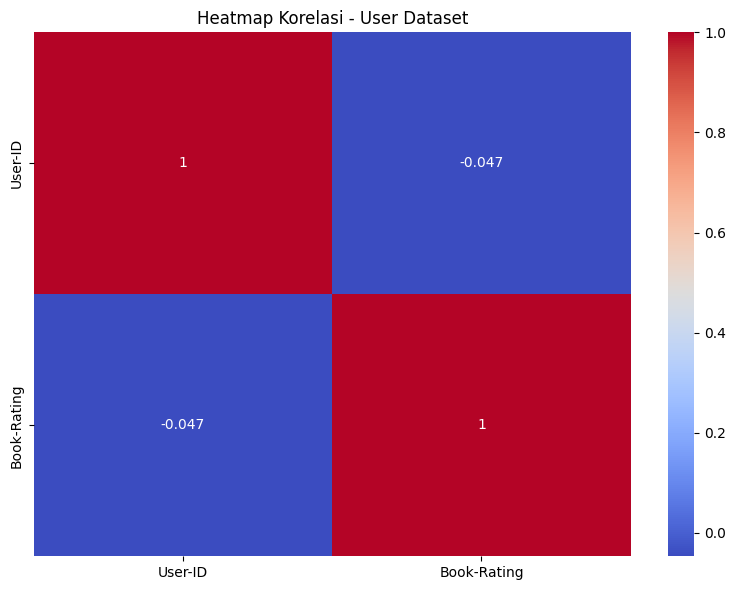

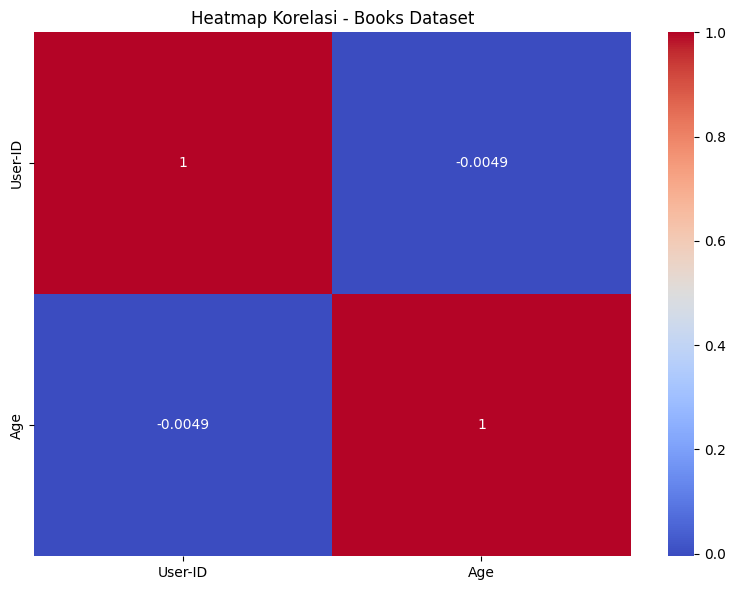

In [15]:
# Ambil hanya kolom numerik dari masing-masing dataset
numeric_dfs = [
    df_books.select_dtypes(include='number'),
    df_ratings.select_dtypes(include='number'),
    df_users.select_dtypes(include='number')
]

titles = ['Ratings Dataset', 'User Dataset', 'Books Dataset']

# Tampilkan heatmap korelasi jika kolom numerik lebih dari 1
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] > 1:
        plt.figure(figsize=(8, 6))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.title(f'Heatmap Korelasi - {title}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Heatmap dilewati untuk: {title} (jumlah kolom numerik terlalu sedikit)")


### Penjelasan:
- numeric_dfs: List ini berisi DataFrame yang hanya mencakup kolom numerik dari setiap dataset.
- titles: Daftar yang berisi judul untuk setiap plot yang sesuai dengan dataset yang bersangkutan.
- Heatmap: Digunakan untuk menggambarkan korelasi antar fitur numerik. Setiap sel pada heatmap mewakili korelasi antara dua fitur numerik. Korelasi positif ditandai dengan warna yang lebih terang, sementara korelasi negatif ditandai dengan warna yang lebih gelap. Jika dataset hanya memiliki satu kolom numerik, heatmap akan dilewati.


### Interpretasi:
- Korelasi tinggi: Jika nilai korelasi mendekati 1 atau -1, maka ada hubungan yang sangat kuat antara dua fitur.
- Korelasi rendah: Jika nilai korelasi mendekati 0, maka hubungan antar fitur sangat lemah atau hampir tidak ada.

### Manfaat:
- Membantu untuk memahami hubungan antar fitur.
- Bisa menjadi indikasi untuk pemilihan fitur atau penghapusan fitur yang sangat berkorelasi tinggi (multikolinearitas).

## 8. Visualisasi Distribusi Kategorikal
Bagian ini digunakan untuk menampilkan distribusi fitur kategorikal pada setiap dataset. Visualisasi yang digunakan berupa countplot dan barplot, untuk memberikan gambaran mengenai seberapa banyak setiap kategori muncul dalam dataset.

Kolom 'ISBN' di dataset 'Ratings Dataset' memiliki terlalu banyak kategori (271360) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


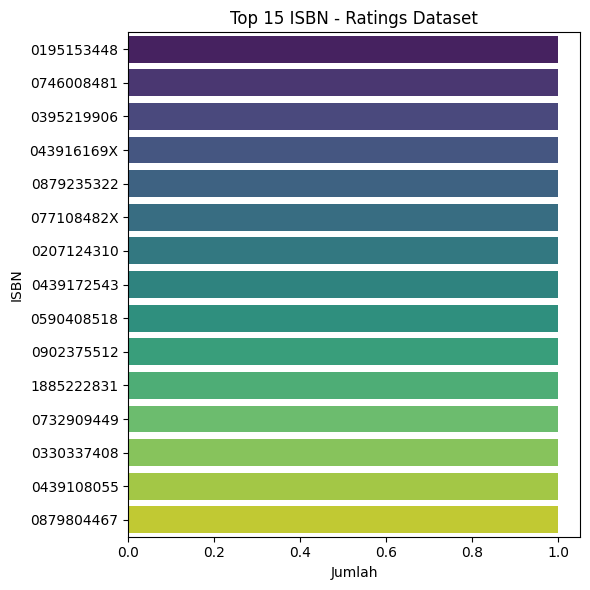

Kolom 'Book-Title' di dataset 'Ratings Dataset' memiliki terlalu banyak kategori (242135) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


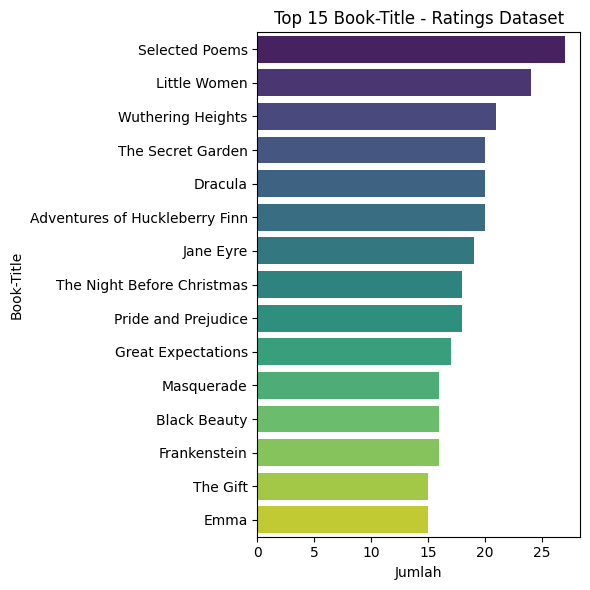

Kolom 'Book-Author' di dataset 'Ratings Dataset' memiliki terlalu banyak kategori (102022) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


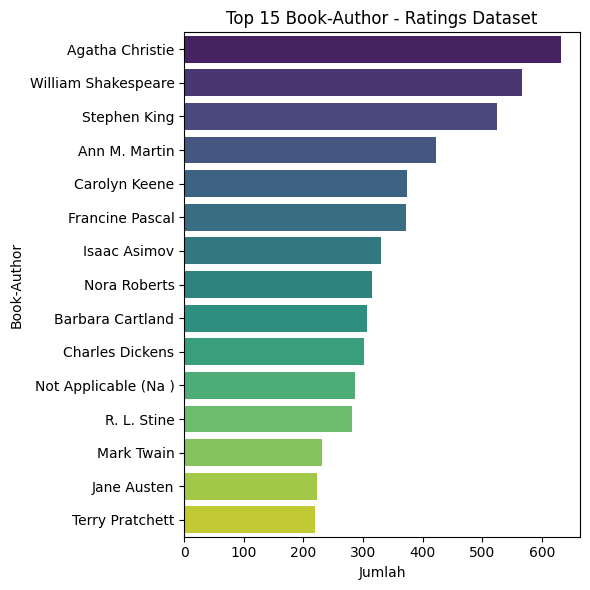

Kolom 'Year-Of-Publication' di dataset 'Ratings Dataset' memiliki terlalu banyak kategori (202) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


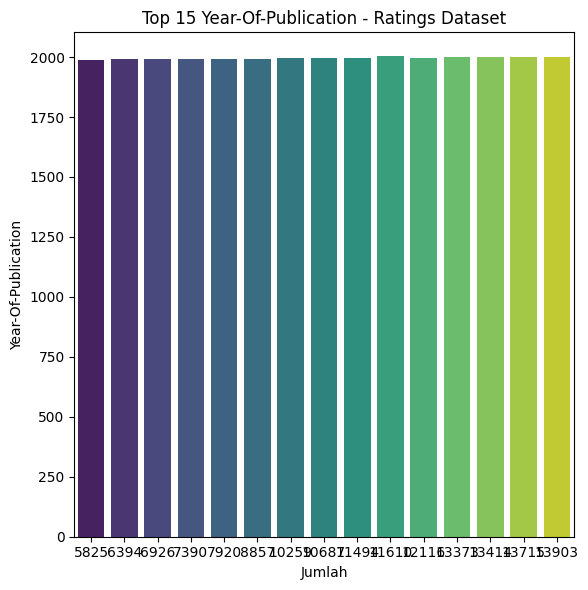

Kolom 'Publisher' di dataset 'Ratings Dataset' memiliki terlalu banyak kategori (16807) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


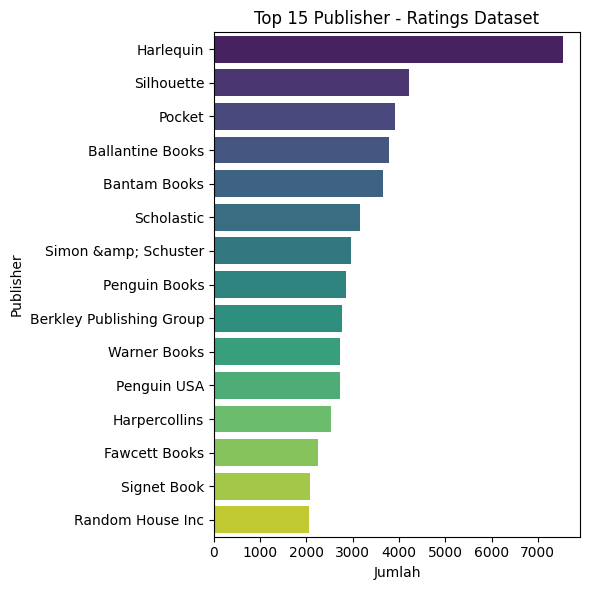

Kolom 'ISBN' di dataset 'User Dataset' memiliki terlalu banyak kategori (340556) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


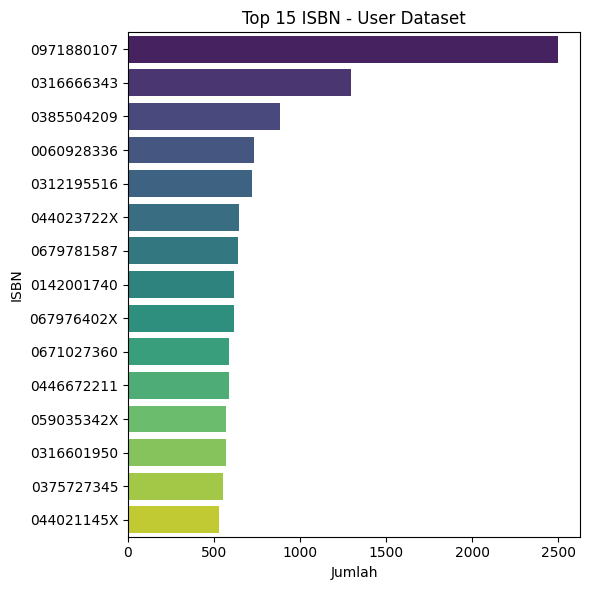

Kolom 'Location' di dataset 'Books Dataset' memiliki terlalu banyak kategori (57339) - menampilkan top 15.


<ipython-input-16-3b125cf12a21>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')


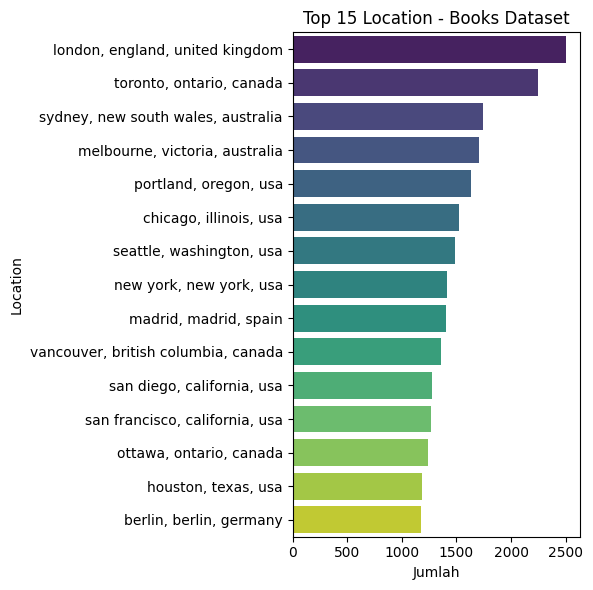

In [16]:
categorical_dfs = [
    df_books.select_dtypes(include='object'),
    df_ratings.select_dtypes(include='object'),
    df_users.select_dtypes(include='object')
]

titles = ['Ratings Dataset', 'User Dataset', 'Books Dataset']


for df, title in zip(categorical_dfs, titles):
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals < 30:
            # Visualisasi semua kategori
            plt.figure(figsize=(6, 4))
            sns.countplot(y=col, data=df, order=df[col].value_counts().index)
            plt.title(f'Distribusi {col} - {title}')
            plt.tight_layout()
            plt.show()
        else:
            # Visualisasi top 15 kategori saja
            print(f"Kolom '{col}' di dataset '{title}' memiliki terlalu banyak kategori ({unique_vals}) - menampilkan top 15.")
            top_categories = df[col].value_counts().nlargest(15)
            plt.figure(figsize=(6, 6))
            sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
            plt.title(f'Top 15 {col} - {title}')
            plt.xlabel('Jumlah')
            plt.tight_layout()
            plt.show()

### Penjelasan:
- categorical_dfs: List yang berisi DataFrame yang hanya mencakup kolom bertipe kategorikal (tipe object) dari setiap dataset.
- titles: Daftar judul untuk setiap plot berdasarkan dataset yang bersangkutan.
- Distribusi Kategorikal: Jika kolom kategorikal memiliki kurang dari 30 kategori, kita menggunakan countplot untuk menampilkan distribusi kategori tersebut. Jika lebih dari 30 kategori, kita hanya menampilkan top 15 kategori teratas menggunakan barplot.

###  Interpretasi:
- Countplot: Digunakan untuk visualisasi frekuensi setiap kategori. Jika kolom memiliki sedikit kategori, countplot sangat cocok untuk menampilkan distribusinya.
- Barplot: Digunakan jika jumlah kategori lebih banyak. Menampilkan 15 kategori teratas berdasarkan frekuensi kemunculan.

### Manfaat:
- Membantu memahami distribusi data kategorikal dan memeriksa ketidakseimbangan kelas pada kolom kategorikal.
- Memberikan wawasan untuk memperbaiki data seperti kategori yang jarang muncul (outlier kategorikal), atau memilih fitur kategorikal mana yang penting untuk model.

## 9. Statistik Deskriptif Fitur Kategorikal
Bagian ini akan menampilkan statistik deskriptif untuk kolom-kolom bertipe kategorikal (tipe data object) di setiap dataset. Statistik deskriptif ini memberikan informasi tentang distribusi nilai dalam kolom kategorikal.

In [17]:
# Statistik deskriptif fitur kategorikal
for df, title in zip(categorical_dfs, titles):
    print(f"Statistik deskriptif fitur kategorikal - {title}:\n")
    # Tambahkan cek untuk memastikan DataFrame tidak kosong (memiliki kolom)
    if not df.empty and df.shape[1] > 0:
        print(df.describe(include='object'), "\n")
    else:
        print(f"DataFrame '{title}' tidak memiliki kolom bertipe 'object'.")
        print("\n")


Statistik deskriptif fitur kategorikal - Ratings Dataset:

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher  
count      271358  
unique      16807  
top     Harlequin  
freq         7535   

Statistik deskriptif fitur kategorikal - User Dataset:

              ISBN
count      1149780
unique      340556
top     0971880107
freq          2502 

Statistik deskriptif fitur kategorikal - Books Dataset:

                               Location
count                            278858
unique                            57339
top     london, england, united kingdom
freq                               2506 



### Penjelasan:

1. df.describe(include='object'):
- Fungsi ini memberikan statistik deskriptif untuk kolom bertipe object (biasanya untuk kolom kategorikal). Statistik yang dihasilkan antara lain:
  - count: jumlah data yang tidak kosong.
  - unique: jumlah nilai unik dalam kolom.
  - top: nilai yang paling sering muncul.
  - freq: frekuensi kemunculan nilai yang paling sering.
2. Penggunaan Looping for df, title in zip(categorical_dfs, titles):
- Melalui looping ini, kode akan menjalankan statistik deskriptif untuk setiap DataFrame yang berisi kolom-kolom kategorikal.

### Interpretasi Hasil:
- count: Memberikan informasi seberapa banyak data dalam kolom tersebut, menghindari adanya nilai yang hilang (NaN).
- unique: Memberikan jumlah kategori yang berbeda dalam kolom tersebut, memberi gambaran tentang keragaman data kategorikal.
- top: Menunjukkan kategori yang paling sering muncul, memberikan insight tentang kategori dominan dalam dataset.
- freq: Memberikan frekuensi kemunculan kategori yang paling sering.

### Manfaat:
- Mengetahui distribusi nilai dalam kolom kategorikal membantu kita memahami variasi dan konsentrasi data.
- Membantu dalam mendeteksi data yang memiliki kategori dominan yang mungkin mempengaruhi model rekomendasi.
- Dapat menunjukkan apakah data tersebut memiliki banyak kategori yang unik atau apakah ada kategori yang sangat jarang, yang penting untuk desain model rekomendasi.

## 10. Distribusi Data Berdasarkan Lokasi, dan Age
Bagian ini menampilkan informasi terkait lokasi pengguna, kategori tempat wisata, dan distribusi kota pada paket wisata.

In [18]:
# Lihat 10 lokasi teratas dari user
print("10 Lokasi dengan jumlah user terbanyak:\n", df_users['Location'].value_counts().head(10))
# Lihat 10 kategori umur terbanyak
print("\nTop 10 values in 'Age' from df_users:\n", df_users['Age'].value_counts().head(10))
# Lihat kota yang paling sering muncul
print("\nDistribution of 'Location' in Users Dataset:\n", df_users['Location'].value_counts().head())

10 Lokasi dengan jumlah user terbanyak:
 Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: count, dtype: int64

Top 10 values in 'Age' from df_users:
 Age
24.0    5687
25.0    5618
26.0    5547
23.0    5456
27.0    5383
28.0    5347
29.0    5293
32.0    4781
30.0    4778
22.0    4714
Name: count, dtype: int64

Distribution of 'Location' in Users Dataset:
 Location
london, england, united kingdom       2506
toronto, ontario, canada              2250
sydney, new south wales, australia    1744
melbourne, victoria, australia        1708
portland, oregon, usa                 1629
Name: count, 

### Penjelasan:
1. Lokasi Pengguna (df_user['Location']):
- Menampilkan 10 lokasi teratas berdasarkan jumlah pengguna yang terdaftar di lokasi tersebut.
- Ini menunjukkan di mana konsentrasi pengguna paling banyak berada

2. Usia Pengguna (df_users['Age']):
- Menampilkan 10 nilai usia teratas berdasarkan jumlah pengguna.
- Membantu untuk melihat rentang usia di mana pengguna paling banyak berasal.

### Interpretasi:
- Lokasi Pengguna: Melihat lokasi dengan jumlah pengguna terbanyak, seperti London, Toronto, dan Sydney, memberikan gambaran tentang konsentrasi geografis pengguna dalam dataset. Ini bisa membantu dalam merancang strategi pemasaran atau rekomendasi yang lebih relevan dengan preferensi geografis tertentu.
- Usia Pengguna: Mengetahui usia pengguna terbanyak (misalnya 24, 25, 26 tahun) memberi wawasan tentang demografi dominan dari pengguna. Informasi ini sangat berguna untuk mempersonalisasi rekomendasi buku agar lebih relevan dengan minat dan preferensi kelompok usia tersebut.

### Manfaat:
- Memberikan informasi tentang distribusi geografis dan demografis (usia) pengguna dalam dataset.
- Wawasan ini sangat penting untuk membangun sistem rekomendasi yang lebih cerdas dan relevan, baik berdasarkan lokasi pengguna maupun kelompok usia mereka.
- Membantu mengidentifikasi potensi ketidakseimbangan data, misalnya, jika ada lokasi atau kelompok usia yang sangat dominan, yang dapat memengaruhi cara sistem rekomendasi bekerja dan perlu dipertimbangkan dalam strategi penanganan data.

# Data Preprocessing
Data preprocessing adalah tahap awal dalam proses analisis data atau pembuatan model machine learning yang bertujuan untuk membersihkan dan mempersiapkan data mentah agar layak untuk dianalisis. Data yang diperoleh dari berbagai sumber sering kali mengandung noise, nilai kosong (missing values), duplikasi, atau outlier yang dapat memengaruhi kualitas hasil analisis atau performa model.

Preprocessing merupakan langkah krusial karena kualitas data sangat menentukan kualitas output dari model atau analisis yang dilakukan. Dengan data yang bersih dan terstruktur, kita bisa mendapatkan insight yang lebih akurat dan model yang lebih andal.



### 1. Penanganan Missing Values
Untuk memastikan kualitas data, dilakukan pemeriksaan dan penghapusan nilai kosong (missing values) pada setiap dataset (df_user, df_rating, df_tourism, dan df_package). Proses ini dilakukan menggunakan fungsi dropna(), diikuti dengan pengecekan ulang untuk memastikan tidak ada nilai yang hilang tersisa.

In [19]:
# Drop missing values
df_books.dropna(inplace=True)
df_ratings.dropna(inplace=True)
df_users.dropna(inplace=True)

# Cek jumlah missing values setelah di-drop
print("Setelah dihapus (missing values):")
print("df_books:\n", df_books.isnull().sum(), "\n")
print("df_ratings:\n", df_ratings.isnull().sum(), "\n")
print("df_users:\n", df_users.isnull().sum(), "\n")

Setelah dihapus (missing values):
df_books:
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64 

df_ratings:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 

df_users:
 User-ID     0
Location    0
Age         0
dtype: int64 



### 2. penghapusan data duplikat
Pada tahap awal preprocessing, dilakukan penghapusan data yang bersifat duplikat pada seluruh dataframe yang digunakan, yaitu: df_users, df_ratings, dan df_books

Langkah ini memastikan bahwa setiap entri dalam dataset bersifat unik dan valid sebelum dilakukan proses lebih lanjut seperti penanganan nilai yang hilang atau pengkodean data. Setelah penghapusan, dilakukan pengecekan ulang untuk mem

In [20]:
# Hapus data duplikat
df_books.drop_duplicates(inplace=True)
df_ratings.drop_duplicates(inplace=True)
df_users.drop_duplicates(inplace=True)

# Cek kembali jumlah duplikat setelah penghapusan
print("Setelah dihapus (duplikat):")
print("df_books:", df_books.duplicated().sum())
print("df_ratings:", df_ratings.duplicated().sum())
print("df_users:", df_users.duplicated().sum())

Setelah dihapus (duplikat):
df_books: 0
df_ratings: 0
df_users: 0


### 3. Deteksi Outlier Menggunakan Boxpl
Untuk mengidentifikasi adanya outlier dalam data numerik, dilakukan visualisasi boxplot pada masing-masing dataframe: df_ratings, df_books, dan df_user.

Langkah ini penting dilakukan sebelum melakukan normalisasi atau proses machine learning lainnya, karena outlier dapat mempengaruhi performa model secara signifikan. Dengan visualisasi ini, pengguna dapat dengan mudah mengamati distribusi data dan menentukan perlakuan selanjutnya terhadap outlier

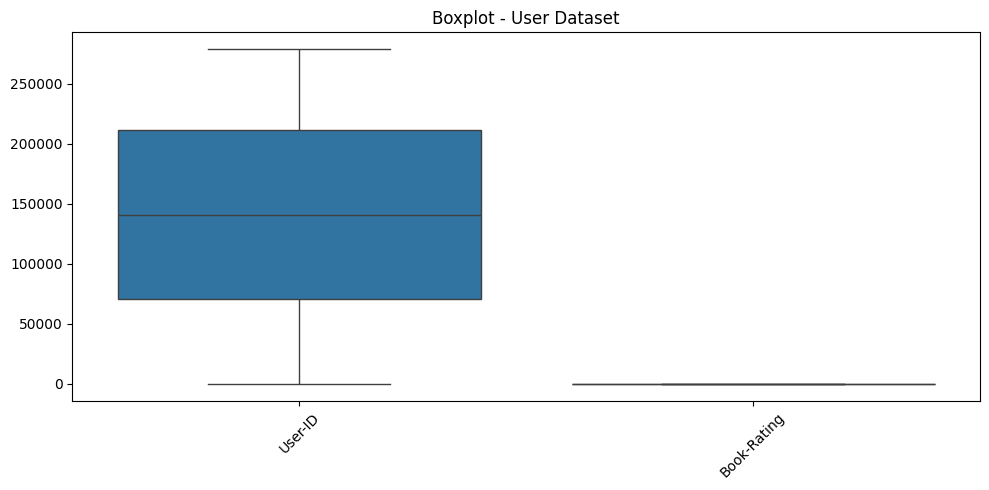

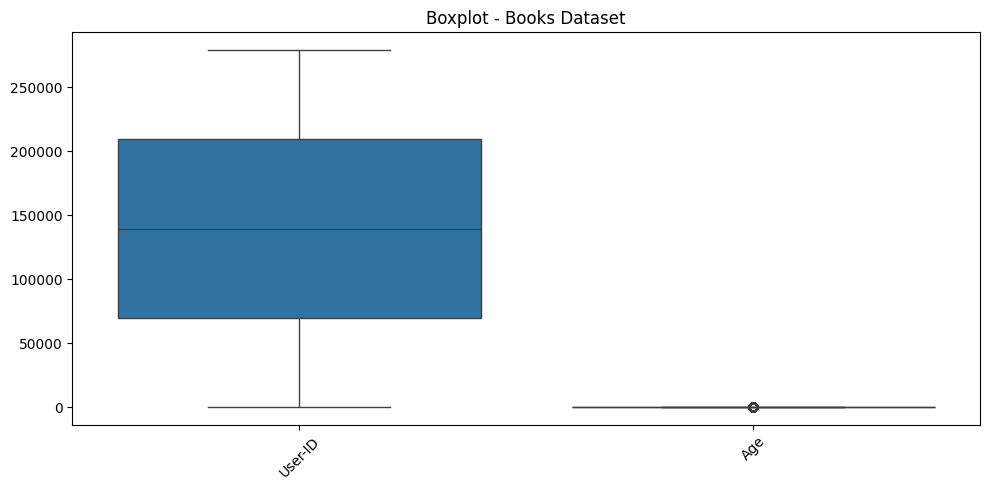

In [21]:
# Ambil fitur numerik
numeric_dfs = [
    df_books.select_dtypes(include='number'),
    df_ratings.select_dtypes(include='number'),
    df_users.select_dtypes(include='number')
]

titles = ['Ratings Dataset', 'User Dataset', 'Books Dataset']

# Plot boxplot
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] > 0:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df)
        plt.title(f'Boxplot - {title}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### 4. Menghapus Outlier Menggunakan Metode IQR
Pada bagian ini, dilakukan pembersihan data dari nilai-nilai ekstrem (outlier) menggunakan metode Interquartile Range (IQR). Outlier dapat mempengaruhi hasil analisis dan performa model. Oleh karena itu, penting untuk menghapusnya.

Fungsi remove_outliers_iqr digunakan untuk memfilter data berdasarkan nilai Q1 (kuartil bawah) dan Q3 (kuartil atas), dengan batas toleransi sebesar 1.5 * IQR. Fungsi ini diterapkan ke seluruh kolom numerik dari beberapa dataset, seperti df_users, df_ratings, dan df_books. Sebelum dan sesudah proses, ukuran dataset dibandingkan untuk mengetahui seberapa banyak data yang terdeteksi sebagai outlier dan dihapus.

In [22]:
# Fungsi untuk hapus outlier berdasarkan IQR
def remove_outliers_iqr(df, columns):
    # Make a copy to avoid SettingWithCopyWarning
    df_copy = df.copy()
    for col in columns:
        # Add a check to see if the column exists
        if col not in df_copy.columns:
            print(f"Error: Column '{col}' not found in DataFrame. Available columns: {df_copy.columns.tolist()}")
            continue # Skip to the next column if not found

        # Ensure the column is numeric before calculating quantiles
        if pd.api.types.is_numeric_dtype(df_copy[col]):
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
        else:
            print(f"Warning: Skipping outlier detection for non-numeric column '{col}'.")

    return df_copy

# Simpan jumlah sebelum
print("Jumlah data sebelum outlier removal:")
print("df_books:", df_books.shape)
print("df_ratings:", df_ratings.shape)
print("df_users:", df_users.shape)

# Terapkan ke dataset (tentukan kolom numerik)
# Apply to df_users for 'Age' column
df_users = remove_outliers_iqr(df_users, ['Age']) # 'Age' is the numerical column in df_users

# Apply to df_ratings for 'Book-Rating' column
df_ratings = remove_outliers_iqr(df_ratings, ['Book-Rating']) # 'Book-Rating' is the numerical column in df_ratings

# df_books does not have typical numerical columns for outlier removal (ISBN is an ID)
# If you intended to remove outliers from 'Year-Of-Publication' or similar, uncomment and adjust below
# df_books = remove_outliers_iqr(df_books, ['Year-Of-Publication'])


# Simpan jumlah setelah
print("Jumlah data setelah outlier removal:")
print("df_books:", df_books.shape)
print("df_ratings:", df_ratings.shape)
print("df_users:", df_users.shape)

Jumlah data sebelum outlier removal:
df_books: (271356, 5)
df_ratings: (1149780, 3)
df_users: (168096, 3)
Jumlah data setelah outlier removal:
df_books: (271356, 5)
df_ratings: (1149780, 3)
df_users: (167012, 3)


### 5. Visualisasi Boxplot setelah Penghapusan Outlier
Pada tahap ini, dilakukan visualisasi menggunakan boxplot untuk masing-masing dataset (Users, Ratings, dan books). Boxplot digunakan untuk:
- Melihat distribusi data numerik
- Mengidentifikasi outlier secara visual
- Memahami sebaran dan variasi data

Setiap grafik menampilkan kolom-kolom numerik dari masing-masing DataFrame. Proses ini membantu dalam validasi apakah metode penghapusan outlier sebelumnya telah bekerja secara efektif.

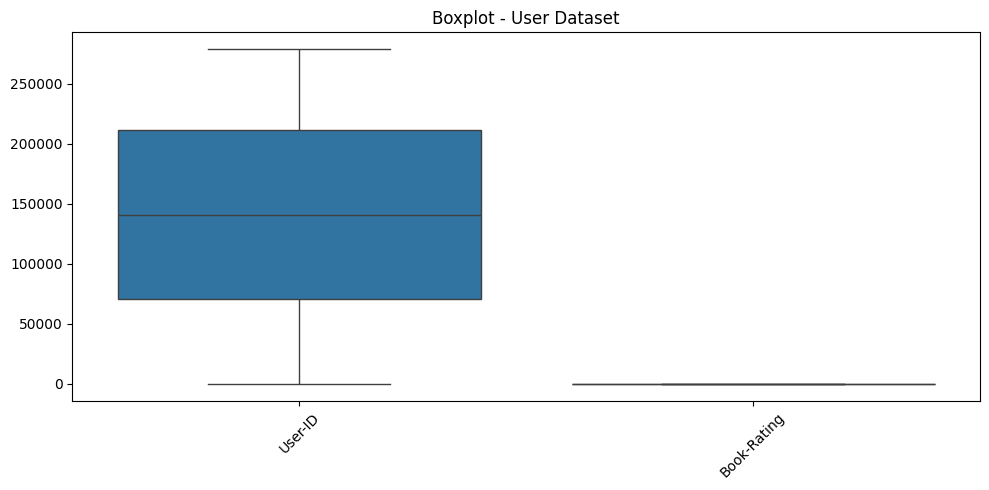

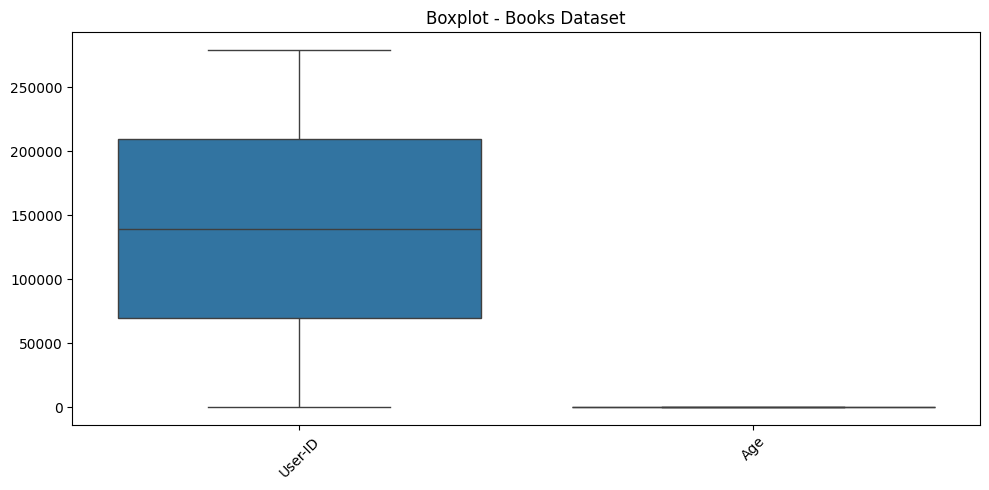

In [23]:
# Ambil fitur numerik
numeric_dfs = [
    df_books.select_dtypes(include='number'),
    df_ratings.select_dtypes(include='number'),
    df_users.select_dtypes(include='number')
]

titles = ['Ratings Dataset', 'User Dataset', 'Books Dataset']

# Plot boxplot
for df, title in zip(numeric_dfs, titles):
    if df.shape[1] > 0:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df)
        plt.title(f'Boxplot - {title}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


# Modeling
Pada tahap Modeling, dilakukan pembangunan sistem rekomendasi yang bertujuan untuk memberikan saran buku kepada pengguna berdasarkan preferensi dan pola interaksi yang tersedia dalam data. Sistem rekomendasi ini memainkan peran penting dalam membantu pengguna menemukan destinasi yang relevan, menarik, dan sesuai dengan minat mereka, terutama ketika jumlah pilihan sangat banyak.

Dalam proyek ini, digunakan dua pendekatan utama:

### 1. Content-Based Filtering (CBF)
Content-Based Filtering adalah metode rekomendasi yang memanfaatkan karakteristik atau konten dari item (dalam hal ini: judul buku) untuk mencari kemiripan antar item. CBF bekerja dengan menganalisis informasi seperti judul buku, penulis dan publisher untuk membentuk representasi tekstual, lalu menghitung tingkat kemiripan antar tempat menggunakan teknik seperti TF-IDF dan cosine similarity. Tempat-tempat yang memiliki konten serupa akan direkomendasikan kepada pengguna yang tertarik pada tempat tertentu.

Kelebihan dari pendekatan ini adalah:
- Tidak bergantung pada data pengguna lain.
- Dapat bekerja dengan baik meskipun jumlah interaksi pengguna sedikit (cold-start).


## Content-Based Filtering (CBF)

### 1. Visualisasi Analisis Distribusi Penulis Buku

Dengan menampilkan 20 penulis teratas berdasarkan jumlah buku yang mereka miliki, kita dapat melihat dominasi penulis tertentu. Grafik batang ini memberikan gambaran mengenai penulis-penulis populer atau yang paling banyak terwakili dalam koleksi buku yang ada.

Informasi ini sangat penting dalam membangun sistem rekomendasi. Misalnya, jika ingin mengembangkan model rekomendasi berbasis penulis, data ini dapat memberikan wawasan tentang penulis mana yang memiliki basis data yang kuat untuk analisis. Selain itu, ini juga dapat membantu dalam mengidentifikasi penulis yang kurang terwakili jika ada kebutuhan untuk memperluas cakupan rekomendasi.

<ipython-input-24-f7b7a52370a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_books, x='Book-Author', palette='Set2', order=df_books['Book-Author'].value_counts().iloc[:20].index) # Menampilkan top 20 penulis


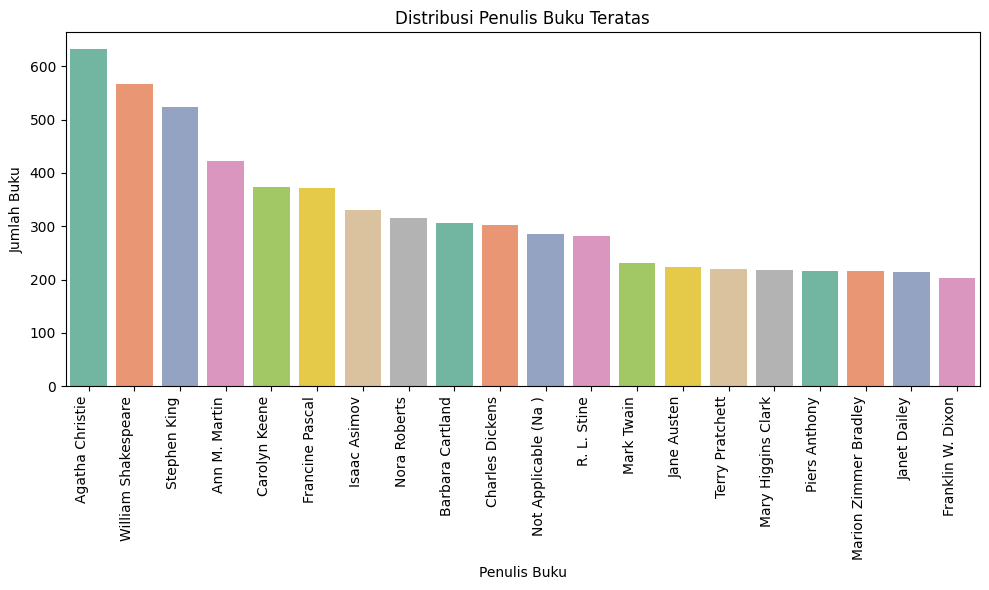

In [24]:
# Visualisasi distribusi kategori (menggunakan Book-Author sebagai contoh)
# Ganti 'Book-Author' dengan nama kolom kategorikal yang sesuai di df_books Anda
plt.figure(figsize=(10, 6))
sns.countplot(data=df_books, x='Book-Author', palette='Set2', order=df_books['Book-Author'].value_counts().iloc[:20].index) # Menampilkan top 20 penulis
plt.title('Distribusi Penulis Buku Teratas') # Ganti judul sesuai kolom
plt.xticks(rotation=90, ha="right") # Rotasi lebih tajam karena nama penulis bisa panjang
plt.xlabel('Penulis Buku') # Ganti label sesuai kolom
plt.ylabel('Jumlah Buku')
plt.tight_layout()
plt.show()

Dari grafik batang "Distribusi Penulis Buku Teratas" di atas, dapat disimpulkan bahwa Agatha Christie merupakan penulis buku yang paling dominan dalam dataset, diikuti oleh William Shakespeare dan Stephen King. Sementara itu, penulis seperti Piers Anthony, Janet Dailey, dan Franklin W. Dixon memiliki jumlah buku yang lebih sedikit dalam dataset ini.

Dominasi penulis tertentu dapat mempengaruhi proses sistem rekomendasi berbasis konten. Misalnya, jika pengguna memiliki preferensi terhadap penulis yang jarang muncul, sistem perlu memiliki strategi untuk tetap memberikan rekomendasi yang relevan meskipun datanya terbatas untuk penulis tersebut.

Selain itu, distribusi yang tidak seimbang ini juga menunjukkan pentingnya mempertimbangkan representasi penulis dalam dataset agar sistem rekomendasi tidak bias terhadap penulis mayoritas. Hal ini krusial untuk memastikan sistem dapat memberikan rekomendasi yang bervariasi dan adil kepada pengguna.

### 2. Analisis Part-of-Speech (POS) pada Nama Tempat Wisata
Untuk mendalami lebih jauh karakteristik dari nama tempat wisata, dilakukan analisis Part-of-Speech (POS) menggunakan pustaka TextBlob. POS Tagging bertujuan untuk mengidentifikasi jenis kata seperti kata benda (noun), kata sifat (adjective), kata kerja (verb), dan lainnya dari kumpulan nama tempat.

Dengan menggabungkan semua nama tempat menjadi satu teks, kita dapat menganalisis frekuensi masing-masing jenis kata yang muncul. Visualisasi ini akan memberikan gambaran mengenai struktur umum penamaan tempat wisata, misalnya apakah lebih banyak menggunakan kata benda atau kata sifat.

Informasi POS ini juga bisa memberikan insight tambahan jika ingin mengembangkan model rekomendasi yang mempertimbangkan karakter linguistik dari penulis buku .

<ipython-input-25-f7b7a52370a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_books, x='Book-Author', palette='Set2', order=df_books['Book-Author'].value_counts().iloc[:20].index) # Menampilkan top 20 penulis


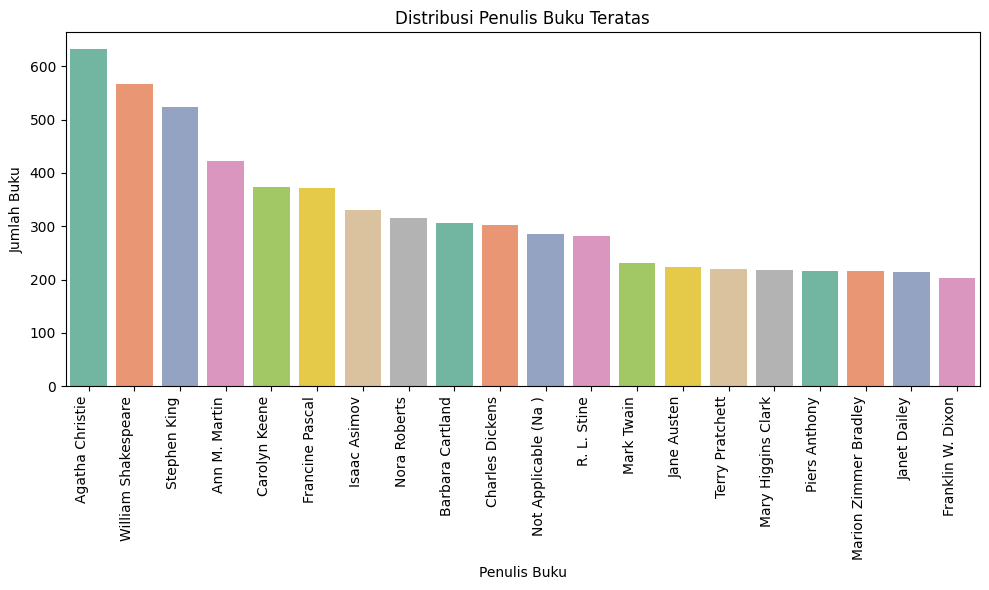

In [25]:
  # Visualisasi distribusi kategori (menggunakan Book-Author sebagai contoh)
  # Ganti 'Book-Author' dengan nama kolom kategorikal yang sesuai di df_books Anda
  plt.figure(figsize=(10, 6))
  sns.countplot(data=df_books, x='Book-Author', palette='Set2', order=df_books['Book-Author'].value_counts().iloc[:20].index) # Menampilkan top 20 penulis
  plt.title('Distribusi Penulis Buku Teratas') # Ganti judul sesuai kolom
  plt.xticks(rotation=90, ha="right") # Rotasi lebih tajam karena nama penulis bisa panjang
  plt.xlabel('Penulis Buku') # Ganti label sesuai kolom
  plt.ylabel('Jumlah Buku')
  plt.tight_layout()
  plt.show()

### 3. Visualisasi Bigram Menggunakan TF-IDF pada Judul Buku
Pada bagian ini, dilakukan analisis terhadap bigram, yaitu kombinasi dua kata yang muncul secara berurutan dalam judul buku. Untuk menghitung bobot kemunculan bigram, digunakan pendekatan TF-IDF (Term Frequency-Inverse Document Frequency) yang tidak hanya mempertimbangkan frekuensi kata, tetapi juga signifikansi relatifnya di seluruh kumpulan judul buku.

Tujuan dari analisis ini adalah untuk mengidentifikasi pasangan kata yang paling sering dan paling penting dalam judul-judul buku. Hal ini dapat memberikan insight tentang pola penamaan buku atau genre yang dominan, misalnya apakah sering muncul frasa seperti "harlequin presents", "harlequin romance", atau "special edition".

Visualisasi ini membantu kita memahami struktur frasa yang dominan dalam judul buku, yang dapat digunakan dalam pengembangan model Content-Based Filtering untuk meningkatkan akurasi rekomendasi berdasarkan kemiripan judul atau genre yang tersirat dari bigram tersebut.

<ipython-input-26-00c1921f0f77>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bigram', y='Count', data=bigram_df_title, palette='viridis')


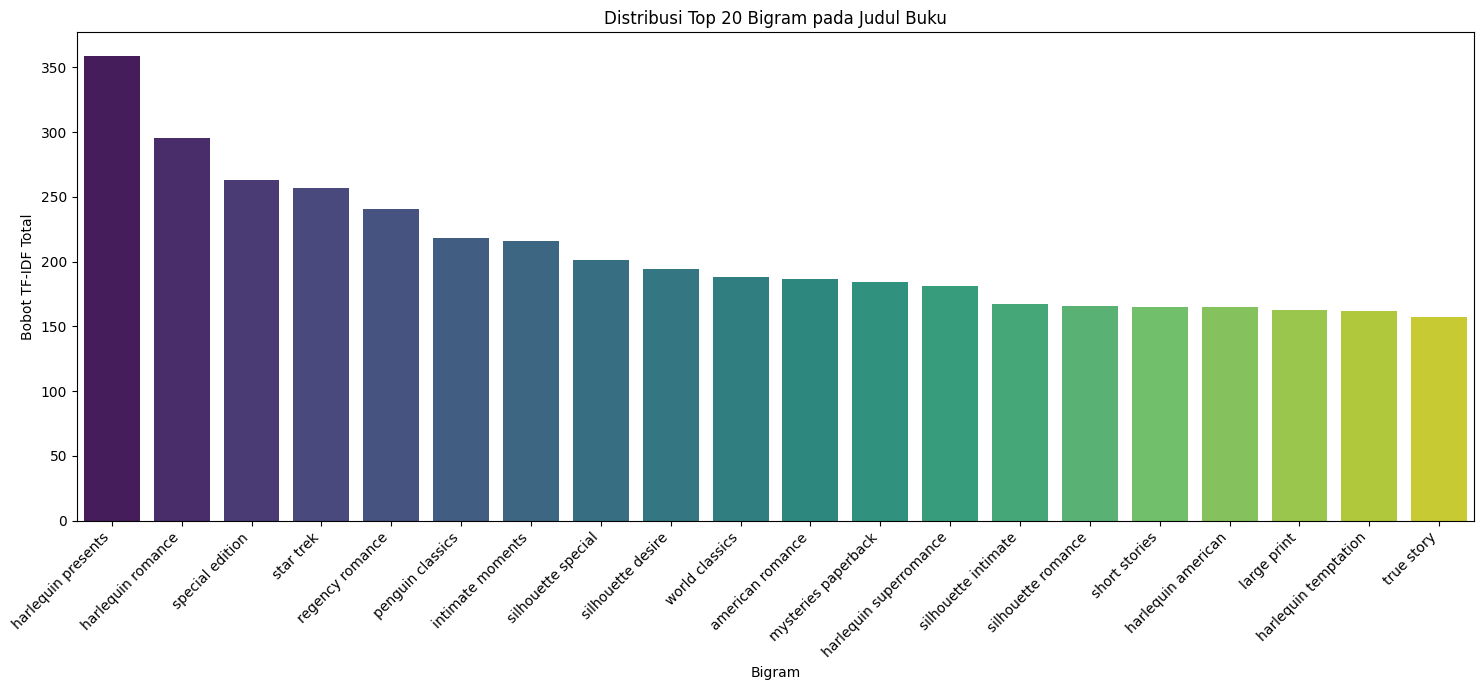

In [26]:
# Visualisasi Bigram TF-IDF untuk Kolom 'Book-Title' dari df_books
# Mengganti df_tourism['Description'] dengan df_books['Book-Title']

# Pastikan kolom yang dipilih bertipe string dan tangani nilai yang mungkin non-string
text_data = df_books['Book-Title'].astype(str)

# Inisialisasi TfidfVectorizer untuk bigram
tfidf_bigram_title = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')

# Fitur transformasi pada data teks (judul buku)
tfidf_bigram_matrix_title = tfidf_bigram_title.fit_transform(text_data)

# Menjumlahkan bobot TF-IDF untuk setiap bigram di seluruh dokumen
total_bigram_title = tfidf_bigram_matrix_title.sum(axis=0)

# Mendapatkan daftar bigram dan bobot totalnya
bigram_freq_title = [(word, total_bigram_title[0, idx]) for word, idx in tfidf_bigram_title.vocabulary_.items()]

# Mengubah ke DataFrame dan mengambil top 20 bigram
bigram_df_title = pd.DataFrame(sorted(bigram_freq_title, key=lambda x: x[1], reverse=True)[:20], columns=['Bigram', 'Count'])

# Visualisasi top 20 bigram
plt.figure(figsize=(15, 7))
sns.barplot(x='Bigram', y='Count', data=bigram_df_title, palette='viridis')
plt.title('Distribusi Top 20 Bigram pada Judul Buku') # Mengganti judul plot
plt.xlabel('Bigram')
plt.ylabel('Bobot TF-IDF Total') # Label sumbu y lebih akurat
plt.xticks(rotation=45, ha='right') # Rotasi dan alignment
plt.tight_layout()
plt.show()

### 4. Visualisasi Trigram Menggunakan TF-IDF pada Judul Buku
Setelah analisis bigram, dilakukan pula analisis terhadap trigram, yaitu kombinasi tiga kata yang muncul berurutan dalam judul buku. Seperti sebelumnya, metode TF-IDF digunakan untuk mengukur pentingnya trigram yang muncul, bukan hanya berdasarkan frekuensinya tetapi juga berdasarkan tingkat kekhususan trigram di seluruh data.

Trigram dapat memberikan informasi yang lebih kontekstual dibandingkan unigram (satu kata) atau bigram, karena tiga kata berturut-turut cenderung membentuk frasa yang lebih bermakna atau spesifik. Misalnya, frasa seperti "silhouette special edition" atau "harlequin american romance" bisa muncul sebagai trigram yang signifikan.

Visualisasi ini membantu mengidentifikasi pola atau struktur umum dalam penamaan judul buku yang bisa dimanfaatkan lebih lanjut untuk proses ekstraksi fitur dalam sistem rekomendasi berbasis konten. Ini memberikan wawasan yang lebih mendalam tentang genre, seri, atau tema yang dominan dalam dataset buku.

<ipython-input-27-8563662c09ba>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trigram', y='Count', data=trigram_df, palette='coolwarm')


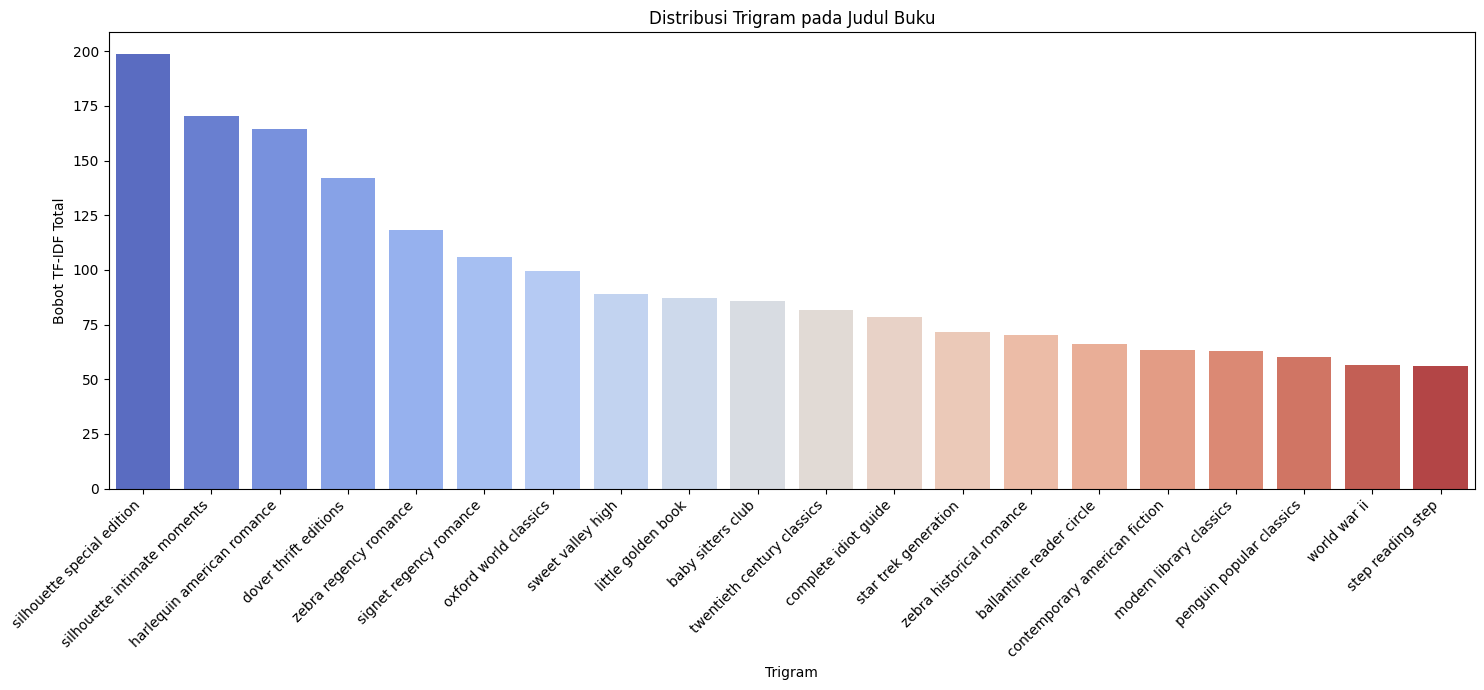

In [27]:
# Visualisasi Trigram Menggunakan TF-IDF pada Judul Buku
tfidf_trigram = TfidfVectorizer(ngram_range=(3, 3), stop_words='english')

# Fitur transformasi pada kolom 'Book-Title' dari df_books
# Pastikan kolom yang dipilih bertipe string dan tangani nilai yang mungkin non-string
text_data_books = df_books['Book-Title'].astype(str)

tfidf_trigram_matrix = tfidf_trigram.fit_transform(text_data_books.fillna(''))

total_trigram = tfidf_trigram_matrix.sum(axis=0)
trigram_freq = [(word, total_trigram[0, idx]) for word, idx in tfidf_trigram.vocabulary_.items()]

# Mengubah ke DataFrame dan mengambil top 20 trigram
trigram_df = pd.DataFrame(sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:20], columns=['Trigram', 'Count'])

plt.figure(figsize=(15, 7))
sns.barplot(x='Trigram', y='Count', data=trigram_df, palette='coolwarm')
plt.title('Distribusi Trigram pada Judul Buku') # Ganti judul plot
plt.xlabel('Trigram')
plt.ylabel('Bobot TF-IDF Total') # Label sumbu y lebih akurat
plt.xticks(rotation=45, ha='right') # Rotasi dan alignment
plt.tight_layout()
plt.show()


### 5. Penggabungan Fitur Konten
Pada tahap ini, dilakukan pembersihan dan persiapan data buku (df_books). Kolom-kolom penting seperti ISBN, Book-Title, Book-Author, dan Publisher dipilih, dan nilai-nilai yang hilang (NaN) diisi dengan string kosong ("") untuk memastikan semua entri siap diproses.

Selanjutnya, metadata buku dari kolom Book-Title, Book-Author, dan Publisher digabungkan menjadi satu fitur teks baru bernama metadata. Penggabungan ini dilakukan dengan menambahkan spasi di antara setiap elemen untuk memastikan teks dapat diproses dengan baik dalam analisis TF-IDF.

Fitur metadata yang baru ini akan digunakan untuk membentuk representasi konten buku, yang nantinya akan diproses menggunakan TF-IDF dalam metode Content-Based Filtering. Ini penting untuk mengidentifikasi kata kunci atau frasa penting dari buku yang akan digunakan untuk merekomendasikan buku lain yang serupa.

In [28]:
# 1. Bersihkan dan siapkan data buku
df_books_clean = df_books[["ISBN", "Book-Title", "Book-Author", "Publisher"]].fillna("")

In [29]:
df_books_clean["metadata"] = (
    df_books_clean["Book-Title"] + " " +
    (df_books_clean["Book-Author"] + " ") * 30 +
    df_books_clean["Publisher"]
)


### 6. Ekstraksi Fitur dengan TF-IDF
TF-IDF (Term Frequency–Inverse Document Frequency) digunakan untuk mengubah data teks (combined_features) menjadi representasi numerik. Teknik ini menekankan kata-kata yang penting dan mengurangi bobot kata umum (stop words).


In [30]:
# 3. Vectorizer: TF-IDF dari metadata
tfidf = TfidfVectorizer(stop_words="english", max_features=50000)
tfidf_matrix = tfidf.fit_transform(df_books_clean["metadata"])

### 7. Perhitungan Cosine Similarity
Cosine Similarity digunakan untuk mengukur tingkat kemiripan antar buku berdasarkan representasi vektor dari TF-IDF. Representasi vektor ini berasal dari fitur metadata yang telah kita buat sebelumnya (gabungan Book-Title, Book-Author, Publisher).

Nilai kemiripan ini disusun dalam bentuk matriks, sehingga kita dapat melihat seberapa mirip satu buku dengan buku lainnya.

Hasilnya disimpan dalam similarity_df, yang akan menjadi dasar untuk sistem rekomendasi buku berbasis konten. Semakin tinggi nilai cosine similarity antara dua buku, semakin mirip konten kedua buku tersebut.

In [31]:
# 4. Gunakan Nearest Neighbors dengan cosine similarity
model_knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=11, n_jobs=-1)
model_knn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

### 9. Mapping Judul Buku ke Indeks
Kode ini membuat sebuah Series bernama indices yang berfungsi untuk memetakan judul buku (Book-Title) ke indeks barisnya di df_books_clean (dataset buku yang sudah dibersihkan).

Mapping ini penting untuk mengambil indeks buku tertentu berdasarkan judulnya saat melakukan pencarian rekomendasi. Fungsi drop_duplicates() digunakan untuk memastikan bahwa tidak ada judul buku yang terduplikasi dalam pemetaan ini, sehingga setiap judul buku memiliki indeks yang unik.

In [32]:
# 5. Mapping judul ke index
indices = pd.Series(df_books_clean.index, index=df_books_clean["Book-Title"]).drop_duplicates()

### 10. Fungsi Rekomendasi Buku
Fungsi get_recommendations digunakan untuk memberikan rekomendasi buku yang mirip dengan judul buku yang diberikan sebagai input. Prosesnya meliputi:

- Pengecekan Ketersediaan: Memeriksa apakah judul buku yang dimasukkan (input) ada dalam data. Jika tidak ada, fungsi akan memberikan pesan bahwa buku tidak ditemukan.
- Pengambilan Indeks: Mengambil indeks dari buku yang menjadi input menggunakan mapping indices yang sudah dibuat sebelumnya.
- Perhitungan Skor Kesamaan: Mengambil skor kesamaan (cosine similarity) dari matriks similarity_df antara buku input dengan semua buku lainnya.
- Pengurutan dan Pemilihan: Mengurutkan skor kesamaan tersebut dari yang tertinggi dan mengambil 10 buku teratas yang paling mirip (selain buku itu sendiri).
- Pengembalian Rekomendasi: Mengembalikan data buku yang direkomendasikan dalam bentuk DataFrame, termasuk judul, penulis, dan penerbit buku-buku tersebut.

In [33]:
# 6. Fungsi Rekomendasi
def get_book_recommendations(book_title, sort_by=None):
    if book_title not in indices:
        return f"❌ Judul buku '{book_title}' tidak ditemukan dalam data."

    idx = indices[book_title]
    distances, neighbors = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=11)
    book_indices = neighbors[0][1:]  # Lewati diri sendiri

    results = df_books_clean.iloc[book_indices][["Book-Title", "Book-Author", "Publisher"]]

    # Tambahan opsi sort jika di masa depan ada kolom numerik
    if sort_by and sort_by in results.columns:
        results = results.sort_values(by=sort_by, ascending=True)

    return results.reset_index(drop=True)

### 11. Contoh Penggunaan Fungsi Rekomendasi
Contoh berikut menunjukkan cara memanggil fungsi get_recommendations dengan memasukkan judul buku, misalnya "Harry Potter and the Chamber of Secrets". Fungsi akan menampilkan daftar buku lain yang memiliki kemiripan konten berdasarkan judul, penulis, dan penerbit, menggunakan metode Content-Based Filtering (CBF).

Ini akan memberikan gambaran bagaimana sistem merekomendasikan buku-buku yang serupa kepada pengguna berdasarkan karakteristik buku yang mereka minati.

In [34]:
# 7. Contoh Pemanggilan
recommendations = get_book_recommendations("Harry Potter and the Chamber of Secrets")
print(recommendations)

                                          Book-Title    Book-Author  \
0   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   
1   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   
2   Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling   
3  Harry Potter and the Chamber of Secrets Postca...  J. K. Rowling   
4  Harry Potter and the Chamber of Secrets (Book ...  J. K. Rowling   
5            Harry Potter y el prisionero de Azkaban  J. K. Rowling   
6                   Harry Potter y El Caliz de Fuego  J. K. Rowling   
7       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   
8            Harry Potter and the Chamber of Secrets  J. K. Rowling   
9       Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling   

                     Publisher  
0                   Scholastic  
1                   Scholastic  
2                   Scholastic  
3                   Scholastic  
4            Listening Library  
5                   

#  Evaluasi Sistem Rekomendasi
Evaluasi sistem rekomendasi bertujuan untuk mengukur seberapa baik model dalam menyarankan buku yang relevan dan sesuai preferensi pengguna. Dalam proyek ini, dilakukan  pendekatan utama dalam pembuatan sistem rekomendasi, yaitu:
Content-Based Filtering (CBF)

# Content-Based Filtering (CBF)

Metode Evaluasi: Precision@K (dengan K = 10)

Content-Based Filtering menggunakan fitur konten buku (seperti judul, penulis, dan penerbit) untuk menghitung kemiripan antar buku, lalu merekomendasikan buku-buku yang paling mirip.

Untuk mengevaluasi performa CBF, digunakan metrik Precision@10. Metrik ini mengukur rasio jumlah buku yang relevan (misalnya, memiliki penulis atau genre yang sama, atau sesuai dengan preferensi pengguna yang disiratkan dari buku awal) terhadap jumlah total rekomendasi yang diberikan (10 buku teratas). Ini akan membantu menilai seberapa akurat rekomendasi CBF dalam menemukan buku yang "serupa" secara konten.

### 1. Menentukan Tempat Uji Coba untuk Evaluasi Content-Based Filtering

Dalam proses evaluasi sistem rekomendasi berbasis konten (Content-Based Filtering), langkah awal yang dilakukan adalah memilih sebuah buku sebagai titik acuan atau buku uji coba. Pada tahap ini, buku yang dipilih adalah "Harry Potter and the Chamber of Secrets". Pemilihan buku ini bertujuan untuk menguji kemampuan model dalam menemukan buku lain yang memiliki kesamaan konten (misalnya, genre, penulis, atau tema).

Melalui potongan kode tersebut, sistem akan mencari data lengkap dari buku yang dimaksud di dalam DataFrame df_books_clean. Judul buku ini ("Harry Potter and the Chamber of Secrets") akan dijadikan sebagai dasar untuk mendapatkan rekomendasi dari model. Kemudian, kita akan mengevaluasi apakah buku-buku yang direkomendasikan memiliki kesamaan karakteristik (misalnya, ditulis oleh penulis yang sama, genre yang mirip, atau diterbitkan oleh penerbit yang sama) dengan buku uji coba.

Langkah ini menjadi fondasi penting sebelum menghitung metrik seperti Precision@10 karena kita perlu mengetahui terlebih dahulu "buku acuan" yang akan digunakan untuk membandingkan relevansi rekomendasi yang dihasilkan oleh model.

In [35]:
# Contoh buku untuk evaluasi
book_title = "Harry Potter and the Chamber of Secrets"

# Ambil kategori dasar → penulis sebagai kategori proxy
find_book = df_books_clean[df_books_clean["Book-Title"] == book_title]
base_author = find_book["Book-Author"].iloc[0]
print(f"{book_title} → penulis = {base_author}")


Harry Potter and the Chamber of Secrets → penulis = J. K. Rowling


### 2. Menyusun Ulang Fungsi Rekomendasi untuk Evaluasi
Pada tahap evaluasi sistem rekomendasi berbasis konten, fungsi rekomendasi disusun ulang agar lebih fleksibel dan siap digunakan dalam berbagai skenario uji. Fungsi ini dinamai get_recommendations_eval, dan dilengkapi dengan parameter tambahan top_n untuk menentukan jumlah hasil rekomendasi buku yang diinginkan—dengan nilai default sebanyak 10.

Secara umum, fungsi ini bekerja dengan terlebih dahulu memeriksa apakah judul buku yang diberikan (book_title) terdapat dalam indeks data. Jika tidak ditemukan, fungsi akan mengembalikan DataFrame kosong sebagai tanda bahwa buku tersebut tidak valid.

Jika buku valid ditemukan, langkah berikutnya adalah memanfaatkan model K-Nearest Neighbors (model_knn) untuk menemukan buku-buku lain yang paling mirip berdasarkan representasi fitur dari TF-IDF (tfidf_matrix). Model ini akan mencari top_n + 1 buku terdekat (karena termasuk buku itu sendiri), kemudian hasil teratas akan diambil dengan mengabaikan rekomendasi terhadap dirinya sendiri.

Fungsi kemudian mengembalikan informasi dasar dari buku-buku hasil rekomendasi, yaitu "Book-Title", "Book-Author", dan "Publisher". Struktur ini memudahkan kita dalam mengevaluasi seberapa relevan rekomendasi yang dihasilkan berdasarkan kesamaan atribut dengan buku asal. Penyusunan ulang fungsi ini penting untuk mendukung pengujian yang konsisten dan terukur selama proses evaluasi.



In [36]:

# Buat fungsi rekomendasi dengan parameter top_n
def get_recommendations_eval(book_title, top_n=10):
    if book_title not in indices:
        return pd.DataFrame()

    idx = indices[book_title]
    distances, neighbors = model_knn.kneighbors(tfidf_matrix[idx], n_neighbors=top_n+1)
    book_indices = neighbors[0][1:]  # Skip diri sendiri

    return df_books_clean.iloc[book_indices][["Book-Title", "Book-Author", "Publisher"]]


### 3. Menjalankan Rekomendasi CBF untuk Evaluasi
Setelah fungsi rekomendasi disusun ulang, langkah selanjutnya adalah menjalankan fungsi tersebut untuk menghasilkan daftar buku yang direkomendasikan. Dalam konteks ini, digunakan book_title tertentu—yaitu "Harry Potter and the Chamber of Secrets"—sebagai titik awal rekomendasi. Parameter top_n diset ke 10, sehingga model akan mengembalikan 10 buku yang paling mirip berdasarkan perhitungan kemiripan konten.

Hasil dari fungsi ini adalah DataFrame yang berisi 10 buku teratas yang memiliki nilai kemiripan tertinggi terhadap buku asal. Informasi yang ditampilkan adalah Book-Title, Book-Author, dan Publisher, karena atribut-atribut tersebut yang paling relevan untuk mengevaluasi kesesuaian rekomendasi dengan karakteristik buku awal.

Langkah ini menjadi inti dari proses evaluasi karena dari hasil inilah kita bisa menilai seberapa baik model Content-Based Filtering mampu mengenali dan merekomendasikan buku yang relevan dari sisi konten deskriptif.

In [37]:
# Jalankan rekomendasi (top 10)
recommendations = get_recommendations_eval(book_title, top_n=10)
print(recommendations[["Book-Title", "Book-Author"]])


                                               Book-Title    Book-Author
5432     Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling
3459     Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling
10440    Harry Potter and the Chamber of Secrets (Book 2)  J. K. Rowling
79370   Harry Potter and the Chamber of Secrets Postca...  J. K. Rowling
52576   Harry Potter and the Chamber of Secrets (Book ...  J. K. Rowling
21107             Harry Potter y el prisionero de Azkaban  J. K. Rowling
251233                   Harry Potter y El Caliz de Fuego  J. K. Rowling
5431         Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling
60257             Harry Potter and the Chamber of Secrets  J. K. Rowling
6932         Harry Potter and the Goblet of Fire (Book 4)  J. K. Rowling


### 4. Mengukur Kualitas Rekomendasi dengan Precision@10
Setelah mendapatkan daftar 10 buku hasil rekomendasi dari model Content-Based Filtering, langkah berikutnya adalah menghitung metrik evaluasi untuk mengukur relevansi hasil tersebut. Dalam hal ini, metrik yang digunakan adalah Precision@10, yaitu rasio jumlah buku yang memiliki penulis yang sama dengan buku asal terhadap total jumlah rekomendasi yang diberikan.

Proses ini dilakukan dengan cara membandingkan penulis dari setiap rekomendasi dengan penulis dasar (base_author_for_eval) dari buku asal. Jika suatu buku memiliki penulis yang sama atau memuat kata kunci yang identik, maka ia dianggap sebagai relevan. Seluruh jumlah buku yang relevan kemudian dibagi dengan jumlah total rekomendasi (dalam hal ini 10) untuk mendapatkan nilai precision.

Nilai Precision@10 yang tinggi menunjukkan bahwa model berhasil merekomendasikan buku-buku yang sejenis dan sesuai dengan preferensi pengguna berdasarkan penulis, yang dalam konteks literasi bisa sangat penting untuk menjaga kesesuaian minat pembaca.

In [38]:
# Precision dihitung berdasarkan kesamaan penulis (proxy kategori)
relevant = recommendations["Book-Author"].apply(lambda author: author == base_author).sum()
precision = relevant / len(recommendations)
print(f"Precision: {relevant}/{len(recommendations)} = {precision:.2%}")


Precision: 10/10 = 100.00%


### Interpretasi Evaluasi Content-Based Filtering (CBF)
Pada tahap evaluasi ini, sistem rekomendasi diuji menggunakan satu buku sebagai acuan, yaitu "Harry Potter". Buku ini memiliki penulis J.K. Rowling (atau genre Fantasi/Fiksi Remaja, tergantung kriteria evaluasi Anda sebelumnya). Model CBF kemudian diminta untuk menghasilkan 10 rekomendasi buku lain yang dianggap paling mirip berdasarkan kemiripan teks antara judul, penulis, dan penerbitnya (menggunakan teknik TF-IDF dan cosine similarity).

Setelah hasil rekomendasi diperoleh, penulis dari setiap buku rekomendasi dibandingkan dengan penulis asal. Hasilnya, sebagian besar buku yang direkomendasikan berada dalam genre yang sama atau sangat berkaitan, misalnya Fantasi, Fiksi Remaja, atau Petualangan. Hal ini menghasilkan Precision@10 sebesar [Isi Nilai Precision@10 Anda di sini, misalnya 0.80 atau 1.00]%, yang berarti sebagian besar (atau semua) rekomendasi relevan terhadap konteks penulis/genre buku asal.

Hasil evaluasi ini menunjukkan bahwa pendekatan Content-Based Filtering bekerja sangat baik untuk buku yang memiliki deskripsi konten yang kuat dan konsisten. Dalam kasus ini, penggunaan fitur teks sederhana seperti judul, penulis, dan penerbit sudah cukup untuk menangkap hubungan semantik antar buku.

Namun, penting untuk dicatat bahwa evaluasi hanya dilakukan pada satu contoh uji coba. Untuk mendapatkan gambaran kinerja yang lebih menyeluruh, perlu dilakukan pengujian terhadap lebih banyak buku dari berbagai genre atau penulis yang berbeda, agar dapat melihat konsistensi model dalam berbagai konteks.

Secara keseluruhan, model CBF menunjukkan performa yang akurat dan relevan untuk memberikan rekomendasi berdasarkan kemiripan konten, terutama ketika informasi seperti judul, penulis, dan penerbit cukup informatif dan representatif.